Please use Google Colaboratory to run this file. Direct link can be found i Github repository "https://github.com/malayjoshi13/ClassifyIris" under "Usage" section.

### Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Import required libraries:

In [2]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss

## Iris Data Set:<a name="data"></a>

In [15]:
#load the csv file into a new pandas dataframe
iris_df = pd.read_csv('/content/drive/My Drive/ClassifyIris/iris_data.csv')

In [16]:
print(iris_df.shape)
iris_df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

The datset consists of **150 samples** in total. Each class of iris flowers consists of **50 samples each**.

## Pre-processing:<a name="pre-processing"></a>

### Define input and output variables:

In [19]:
#Load the input variables into X

X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [20]:
#Load the output variable into y

y = iris_df['Species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### Split datset into train and test sets:

Let us consider 70% data for training and 30% of data for testing.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


In [22]:
np.unique(y_test, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([17, 14, 14]))

### Normalize the feature set X_train and X_test:

In [23]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train[0:5]

array([[ 0.68955032,  0.31339687,  0.3889435 ,  0.37346859],
       [-0.96174124,  0.55185102, -1.2284453 , -0.95582639],
       [ 0.18146061, -0.87887384,  0.73552681,  0.50639809],
       [-0.07258424, -0.87887384,  0.73552681,  0.90518658],
       [-0.58067396, -0.16351141,  0.3889435 ,  0.37346859]])

In [24]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test[0:5]

array([[-1.33519891,  0.39233578, -1.21491142, -1.22307682],
       [-1.33519891,  0.17437146, -1.15968817, -1.22307682],
       [-0.45323266,  0.82826443, -1.15968817, -0.96588777],
       [-0.89421579, -0.04359286, -1.10446493, -1.22307682],
       [-0.12249531,  3.00790765, -1.15968817, -0.96588777]])

## Function to plot the confusion matrix:

Let us define a function that plots the confusion matrix for the classification models. The predicted values, yhat from each model is given as an argument to the plot function.

In [25]:
def confusion_matrix_plot(yhat):
    labels = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

    matrix = confusion_matrix(yhat, y_test, labels=labels)

    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(matrix, annot = True, xticklabels = labels, yticklabels = labels, cmap = "Blues")
    ax.set_title("Confusion Matrix", fontsize=18)
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("Actual", fontsize=14)

# Classification Models:<a name="models"></a>

## K Nearest Neighbours:<a name="KNN"></a>

Since we know that there are 3 classes of iris flowers, we fix the **k value to 3**.

In [26]:
#Create an instance of the KNN classifier with k = 3
neigh = KNeighborsClassifier(n_neighbors = 3)

#Fit the model with the training data X_train and y_train
neigh.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_KNN
yhat_KNN = neigh.predict(X_test)

#Use the real values y_test and the predicted values yhat_KNN to find the accuracy of the model 
print("Accuracy of the KNN model: ", accuracy_score(y_test, yhat_KNN))

Accuracy of the KNN model:  0.9111111111111111


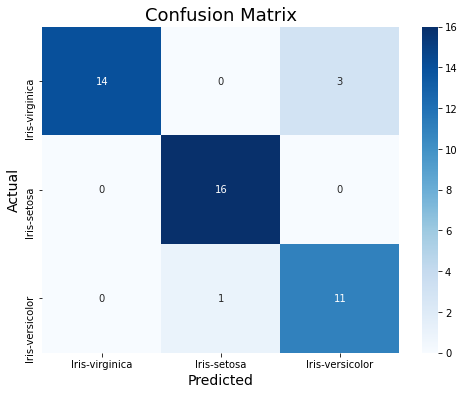

In [27]:
#Plot the confusion matrix. Use the predicted values, yhat_KNN as the attribute.
confusion_matrix_plot(yhat_KNN)

**41 samples** from the 45 test samples were predicted correctly, which is an accuracy of **91.11%**

In [33]:
#Use the real values y_test and the predicted values yhat_KNN to estimate the F1-Score.
print("f1_score: ", f1_score(y_test, yhat_KNN, average='weighted'))

f1_score:  0.9105814138072204


## Decision Tree:<a name="decision-tree"></a>

In [29]:
#Create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the training data X_train and y_train
dec_tree.fit(X_train, y_train)

#Use the test data X_test to predict the output, yhat_tree
yhat_tree = dec_tree.predict(X_test)

#Use the real values y_test and the predicted values yhat_tree to find the accuracy of the model 
print("Accuracy of the Decision Tree: ", accuracy_score(y_test, yhat_tree))

Accuracy of the Decision Tree:  0.9111111111111111


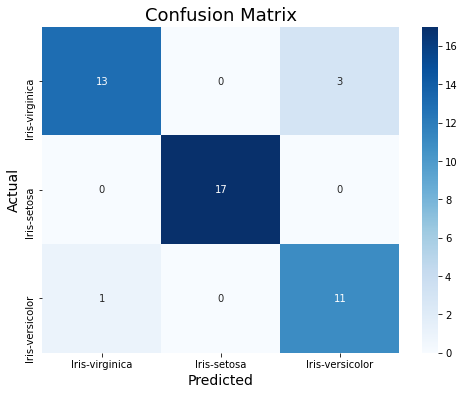

In [30]:
#Plot the confusion matrix. Use the predicted values, yhat_tree as the attribute.
confusion_matrix_plot(yhat_tree)

**42 samples** from the 45 test samples were predicted correctly, which is an accuarcy of **93.33%**

In [32]:
#Use the real values y_test and the predicted values yhat_tree to estimate the F1-Score.
print("f1_score: ", f1_score(y_test, yhat_tree, average='weighted'))

f1_score:  0.9106552706552706


## Support Vector Machine:<a name="SVM"></a>

In [34]:
#Create an instance of the svm classifier using the kernel function, rbf (Radial Basis Function)
svm_model = svm.SVC(kernel='rbf', gamma = 'auto')

#Fit the model with the training data X_train and y_train
svm_model.fit(X_train, y_train)

#Use the test data X_test to predict the output, yhat_svm
yhat_svm = svm_model.predict(X_test)

#Use the real values y_test and the predicted values yhat_svm to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_svm))

Accuracy of the SVM Model : 0.9111111111111111


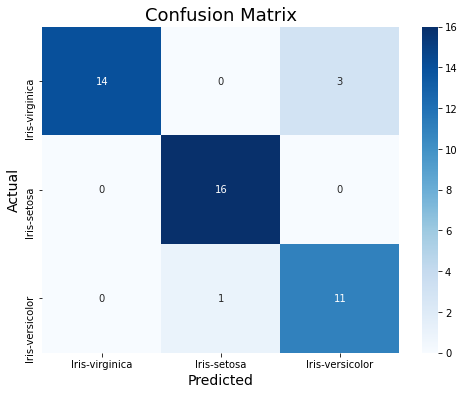

In [35]:
#Plot the confusion matrix. Use the predicted values, yhat_svm as the attribute.
confusion_matrix_plot(yhat_svm)

**41 samples** from the 45 test samples were predicted correctly, which is an accuarcy of **84.44%**

In [36]:
#Use the real values y_test and the predicted values yhat_svm to estimate the F1-Score.
print("f1_score: ", f1_score(y_test, yhat_svm, average='weighted'))

f1_score:  0.9105814138072204


## Logistic Regression:<a name="LR"></a>

In [37]:
#Create an instance of the Logistic Regression classification model
#using the 'liblinear' optimizer and set C, the Inverse of regularization strength to 0.01
LR = LogisticRegression(C=0.01, solver='liblinear')

#Fit the model with the training data X_train and y_train
LR.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_LR
yhat_LR = LR.predict(X_test)

#Use the real values y_test and the predicted values yhat_LR to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_LR))

Accuracy of the SVM Model : 0.8444444444444444


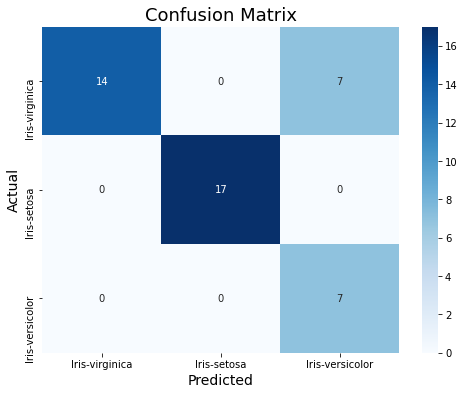

In [38]:
#Plot the confusion matrix. Use the predicted values, yhat_LR as the attribute.
confusion_matrix_plot(yhat_LR)

**38 samples** from the 45 test samples were predicted correctly, which is an accuarcy of **84.44%**

In [39]:
#predict_proba returns estimates for all classes, ordered by the label of classes. It is used to compute the Log Loss.
yhat_prob_LR = LR.predict_proba(X_test)

In [40]:
#Use the real values y_test and the predicted values yhat_LR to estimate the F1-Score and the Log Loss.
print("f1_score: ", f1_score(y_test, yhat_LR, average='weighted'))
print("Log Loss: ", log_loss(y_test, yhat_prob_LR))

f1_score:  0.8340740740740741
Log Loss:  0.838765245932662


In this case best model is the, **Decision** classification algorithm so we train it on whole dataset.

In [41]:
#Create an instance of the decision tree classifier
final_model = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the complete data set X and y
final_model.fit(X, y)

#Training set accuracy of the model
yhat_final = final_model.predict(X)
print("Training set accuracy of the Final Decision Tree Model :", accuracy_score(y, yhat_final))

Training set accuracy of the Final Decision Tree Model : 1.0
